In [84]:
import os
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
import multiprocessing

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz,export_text, plot_tree
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier 


from sklearn import metrics
import graphviz

import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

## 데이터 불러오기

In [3]:
df = pd.read_csv('../data/pima-indians-diabetes.data.csv')
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [4]:
x_data = df.iloc[:,:-1]
y_data = df.iloc[:,-1]

print(x_data.shape, y_data.shape)

(768, 8) (768,)


## 데이터 셋 구분

In [5]:
# 학습, 테스트 데이터셋
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
        test_size=0.2, stratify=y_data)

In [6]:
print(x_train.shape,y_train.shape)

(614, 8) (614,)


In [105]:
estimators = [('scaler',StandardScaler()),
              ('logi',LogisticRegression())]

pipe = Pipeline(estimators)              

param = {'logi__penalty':['l2', 'l1', 'elasticnet'],
         'logi__C':[i for i in np.linspace(0,10,10)],
         'logi__solver':['newton-cg','lbfgs','sag','saga']}

gridLogi = GridSearchCV(pipe, param_grid=param, verbose=1)
gridLogi.fit(x_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    2.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logi',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
         

In [106]:
# 최적 파라미터 구하기
gridLogi.best_params_

{'logi__C': 1.1111111111111112,
 'logi__penalty': 'l2',
 'logi__solver': 'newton-cg'}

### 정확도, 정밀도, 재현율, f1_score

In [107]:
y_pred = gridLogi.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [108]:
print(f'정확도     : {gridLogi.score(x_test, y_test)}')
print(f'정밀도     : {metrics.precision_score(y_test,y_pred)}')
print(f'재현율     : {metrics.recall_score(y_test,y_pred)}')
print(f'f1_score : {metrics.f1_score(y_test, y_pred)}')

정확도     : 0.7337662337662337
정밀도     : 0.6756756756756757
재현율     : 0.46296296296296297
f1_score : 0.5494505494505494


### roc

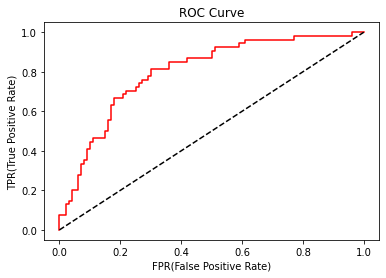

In [109]:
# ROC 커브
proba = gridLogi.predict_proba(x_test)
fpr, tpr, thresholds = metrics.roc_curve( y_test,proba[:,1]) 

plt.plot( fpr, tpr , 'r-')
plt.plot( [0,1],[0,1], 'k--' ) 

plt.title('ROC Curve')
plt.xlabel('FPR(False Positive Rate)')
plt.ylabel('TPR(True Positive Rate)')


plt.show()

### validation_curve

In [110]:
from sklearn.model_selection import validation_curve

In [118]:
pipe_logi = make_pipeline(StandardScaler(),LogisticRegression())

In [119]:
pipe_logi

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [134]:
param_range= [i for i in np.linspace(0,10,50)]

train_score,test_score = validation_curve(estimator=pipe_logi, 
                                          X=x_train, y=y_train, 
                                          param_name='logisticregression__C', 
                                          param_range=param_range, 
                                            cv=5,verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    1.7s finished


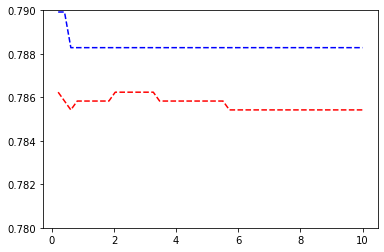

In [135]:
plt.ylim(0.78,0.79)
plt.plot(param_range, train_score.mean(axis=1), 'r--')
plt.plot(param_range, test_score.mean(axis=1), 'b--')
plt.show()

### KNN 모델

In [138]:
### Knn
estimators = [('scaler',StandardScaler()),
              ('knn',KNeighborsClassifier())]

pipe = Pipeline(estimators)              

param = {'knn__n_neighbors':[i for i in range(0,10)],
         'knn__algorithm':['ball_tree','kd_tree','brute'],
         'knn__weights':['uniform','distance']}

gridknn = GridSearchCV(pipe, param_grid=param, verbose=1)
gridknn.fit(x_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
        

In [139]:
# 최적의 파라미터
gridknn.best_params_

{'knn__algorithm': 'ball_tree',
 'knn__n_neighbors': 8,
 'knn__weights': 'distance'}

### Tree 모델

In [145]:
### Tree
estimators = [('scaler',StandardScaler()),
              ('tree',DecisionTreeClassifier())]

pipe = Pipeline(estimators)              

param = {'tree__criterion':['gini','entropy'],
         'tree__splitter':['best','random'],
         'tree__max_depth':[i for i in range(0,10)],
        'tree__min_samples_split':[i for i in range(0,10)],
         'tree__min_samples_leaf':[i for i in range(0,10)]}

gridtree = GridSearchCV(pipe, param_grid=param, verbose=1)
gridtree.fit(x_train, y_train)

Fitting 5 folds for each of 4000 candidates, totalling 20000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 20000 out of 20000 | elapsed:  1.1min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('tree',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                 

In [146]:
gridtree.best_params_

{'tree__criterion': 'gini',
 'tree__max_depth': 6,
 'tree__min_samples_leaf': 6,
 'tree__min_samples_split': 8,
 'tree__splitter': 'random'}

### Voting (Logi, KNN, Tree)

In [147]:
model_vote = VotingClassifier(estimators=[('LogisticRegression',gridLogi), ('Knn',gridknn),
                                          ('Tree', gridtree)], voting='soft')
model_vote.fit(x_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 4000 candidates, totalling 20000 fits


[Parallel(n_jobs=1)]: Done 20000 out of 20000 | elapsed:  1.0min finished


VotingClassifier(estimators=[('LogisticRegression',
                              GridSearchCV(cv=None, error_score=nan,
                                           estimator=Pipeline(memory=None,
                                                              steps=[('scaler',
                                                                      StandardScaler(copy=True,
                                                                                     with_mean=True,
                                                                                     with_std=True)),
                                                                     ('knn',
                                                                      KNeighborsClassifier(algorithm='auto',
                                                                                           leaf_size=30,
                                                                                           metric='minkowski',
                       

In [198]:
y_pred = model_vote.predict(x_test)

In [150]:
print(f'정확도     : {model_vote.score(x_test, y_test)}')
print(f'정밀도     : {metrics.precision_score(y_test,y_pred)}')
print(f'재현율     : {metrics.recall_score(y_test,y_pred)}')
print(f'f1_score : {metrics.f1_score(y_test, y_pred)}')

정확도     : 0.6948051948051948
정밀도     : 0.6
재현율     : 0.3888888888888889
f1_score : 0.47191011235955055


### ROC 커브

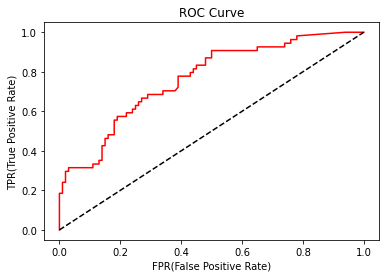

In [151]:
proba = model_vote.predict_proba(x_test)
fpr, tpr, thresholds = metrics.roc_curve( y_test,proba[:,1]) 

plt.plot( fpr, tpr , 'r-')
plt.plot( [0,1],[0,1], 'k--' ) 

plt.title('ROC Curve')
plt.xlabel('FPR(False Positive Rate)')
plt.ylabel('TPR(True Positive Rate)')


plt.show()

In [169]:
# vadtion_curve
param_range= [i for i in np.linspace(0,10,50)]

train_score,test_score = validation_curve(estimator=model_vote, 
                                          X=x_train, y=y_train, 
                                          param_name=?, 
                                          param_range=param_range, 
                                            cv=5,verbose=1)

SyntaxError: invalid syntax (<ipython-input-169-567a72ceb563>, line 6)

In [172]:
### Tree
estimators = [('scaler',StandardScaler()),
              ('forest',RandomForestClassifier())]

pipe = Pipeline(estimators)              

param = {'forest__n_estimators':[i for i in range(100,110)],
         'forest__max_depth':[i for i in range(0,5)]

        }

gridtree = GridSearchCV(pipe, param_grid=param, verbose=1)
gridtree.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   24.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('forest',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                        

In [173]:
gridtree.best_params_

{'forest__max_depth': 4, 'forest__n_estimators': 101}

### 최적의 파라미터로 파이프라인 만들기

In [177]:
model_pipe_tree = make_pipeline(StandardScaler(),RandomForestClassifier(max_depth=4,n_estimators=101))

In [178]:
model_bagg = BaggingClassifier(base_estimator=model_pipe_tree, n_estimators=10,
                               bootstrap = True, max_samples = 0.5)
model_bagg.fit(x_train, y_train)

# 교차검증
model_cross = cross_validate(model_bagg, X=x_train, y=y_train, cv=5,verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.3s finished


In [180]:
y_pred = model_bagg.predict(x_test)

In [181]:
print(f'정확도     : {model_bagg.score(x_test, y_test)}')
print(f'정밀도     : {metrics.precision_score(y_test,y_pred)}')
print(f'재현율     : {metrics.recall_score(y_test,y_pred)}')
print(f'f1_score : {metrics.f1_score(y_test, y_pred)}')

정확도     : 0.7012987012987013
정밀도     : 0.625
재현율     : 0.37037037037037035
f1_score : 0.4651162790697674


### ROC 커브

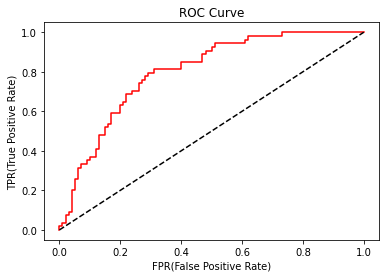

In [182]:
proba = model_bagg.predict_proba(x_test)
fpr, tpr, thresholds = metrics.roc_curve( y_test,proba[:,1]) 

plt.plot( fpr, tpr , 'r-')
plt.plot( [0,1],[0,1], 'k--' ) 

plt.title('ROC Curve')
plt.xlabel('FPR(False Positive Rate)')
plt.ylabel('TPR(True Positive Rate)')


plt.show()

### vadation_curve

In [194]:
param_range= [i for i in np.linspace(0,10,50)]

train_score,test_score = validation_curve(estimator=model_pipe_tree, 
                                          X=x_train, y=y_train, 
                                          param_name='randomforestclassifier__max_features', 
                                          param_range=param_range, 
                                            cv=5,verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   10.0s finished


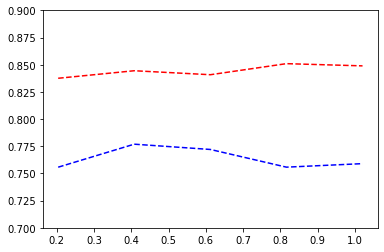

In [197]:
plt.ylim(0.7,0.9)
plt.plot(param_range, train_score.mean(axis=1), 'r--')
plt.plot(param_range, test_score.mean(axis=1), 'b--')
plt.show()